In [1]:
import pandas as pd
df = pd.read_csv("input.csv")
df = df[df["open"] > 0]
df = df[df["last"] > 0]
df = df[df["high"] > 0]
# df = df[df["last"] > df["open"]]
df = df.sort_values(by=['time'], ascending=False)


df.head()

,open,high,low,last,time
8766,1449.714395,1453.232111,1435.547197,1435.547197,1544396400000
8765,1438.910807,1468.282751,1438.910807,1454.028251,1544137200000
8764,1477.900484,1477.900484,1436.662938,1436.662938,1544050800000
8763,1502.368353,1502.368353,1478.905075,1478.957336,1543964400000
8762,1528.553500,1528.717797,1506.426502,1506.426502,1543878000000


In [2]:
# if (df[df["last"] > df["open"]]) {}
# df["closeHighRatio"] = ((df["last"]-df["open"]) / (df["high"]-df["open"]))
df["pct"]= ((df["last"] / df["last"].shift(-1))-1)

# df.to_csv("out.csv", index=True)
df.loc[df["last"] > df["open"] , 'closeHighRatio'] = (((df["last"]-df["open"]) / (df["high"]-df["low"])))*100
df.loc[df["last"] < df["open"] , 'closeHighRatio'] = (((df["open"]-df["last"]) / (df["high"]-df["low"])))*100
df["nextPct"] = df["pct"].shift(-1)
df["gap"] = ((df["open"]/df["last"].shift(-1))-1)

df["highPct"] = ((df["high"]/df["open"])-1)
df["lowPct"] = ((df["low"]/df["open"])-1)
df["lastPct"] = ((df["last"]/df["open"])-1)

# df.to_csv("out.csv", index=True)




# df2 = pd.read_csv("out.csv")
df = df.dropna()
# df2["lol"] = df2["last"].shift(-1)
df.head()

,open,high,low,last,time,pct,closeHighRatio,nextPct,gap,highPct,lowPct,lastPct
8766,1449.714395,1453.232111,1435.547197,1435.547197,1544396400000,-0.012710,80.108945,0.012087,-0.002967,0.002426,-0.009772,-0.009772
8765,1438.910807,1468.282751,1438.910807,1454.028251,1544137200000,0.012087,51.468994,-0.028597,0.001565,0.020413,0.000000,0.010506
8764,1477.900484,1477.900484,1436.662938,1436.662938,1544050800000,-0.028597,100.000000,-0.018235,-0.000715,0.000000,-0.027903,-0.027903
8763,1502.368353,1502.368353,1478.905075,1478.957336,1543964400000,-0.018235,99.777265,-0.015268,-0.002694,0.000000,-0.015618,-0.015583
8762,1528.553500,1528.717797,1506.426502,1506.426502,1543878000000,-0.015268,99.262954,0.010002,-0.000804,0.000107,-0.014476,-0.014476


In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

df = df[df["closeHighRatio"] < 100]
# df2['nextClosePct'] = df2['nextClosePct'] * 100

# df2 = df[df["pct"] >= 0.05]
# df2 = df
# data.plot( x=df2["closeHighRatio"], y=df2["nextClosePct"], kind='hist')
# plt.scatter(df2['closeHighRatio'], df2['nextPct'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.
# print (df2.describe())

In [4]:
# plt.scatter(df2['pct'], df2['nextPct'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.

# plt.scatter(df2['closeHighRatio'], df2['pct'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.

# plt.scatter(df2['closeHighRatio'], df2['nextPct'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.


# df3 = df2
# df3['pct'] = df3['pct'].apply(lambda x: round(x, 2))
# df3['nextPct'] = df3['nextPct'].apply(lambda x: round(x, 2))
# plt.scatter(df3['pct'], df3['nextPct'])
# plt.show() # Depending on whether you use IPython or interactive mode, etc.
# plot = df3m.plot(x=df3m['pct'],y=df3m['nextPct'],kind="hist")


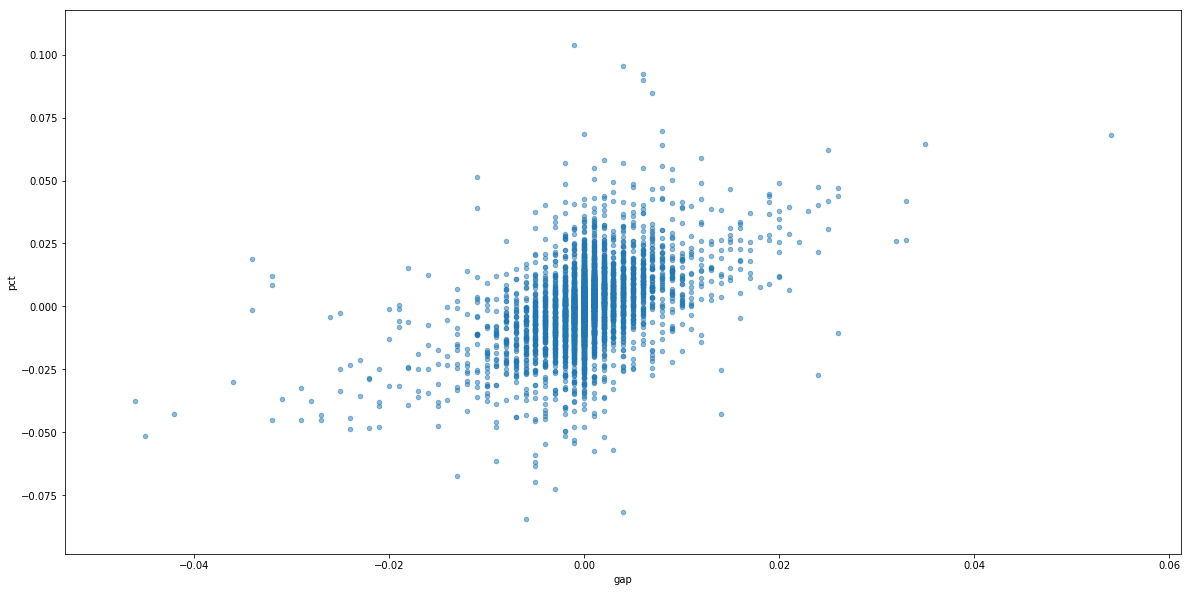

In [39]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

dfMean = df[['pct', 'closeHighRatio', 'nextPct', 'gap', 'highPct', 'lowPct']].copy()
dfMean['gap'] = df4['gap'].apply(lambda x: round(x, 3))

# print(df4.groupby('gap').mean())
# df4.groupby('gap').mean().plot.bar()
dfMean.groupby('gap').mean().reset_index()
# groups = df.groupby(['Gender','Married']).size()
# dfMean.plot.bar()

# # print(df4)
# sns.pairplot(df4.groupby('gap').mean())
# sns.pairplot(dfMean)

# plt.show()
dfMean.plot(kind="scatter", x="gap", y="pct", alpha=0.5)
plt.show() # Depending on whether you use IPython or interactive mode, etc.


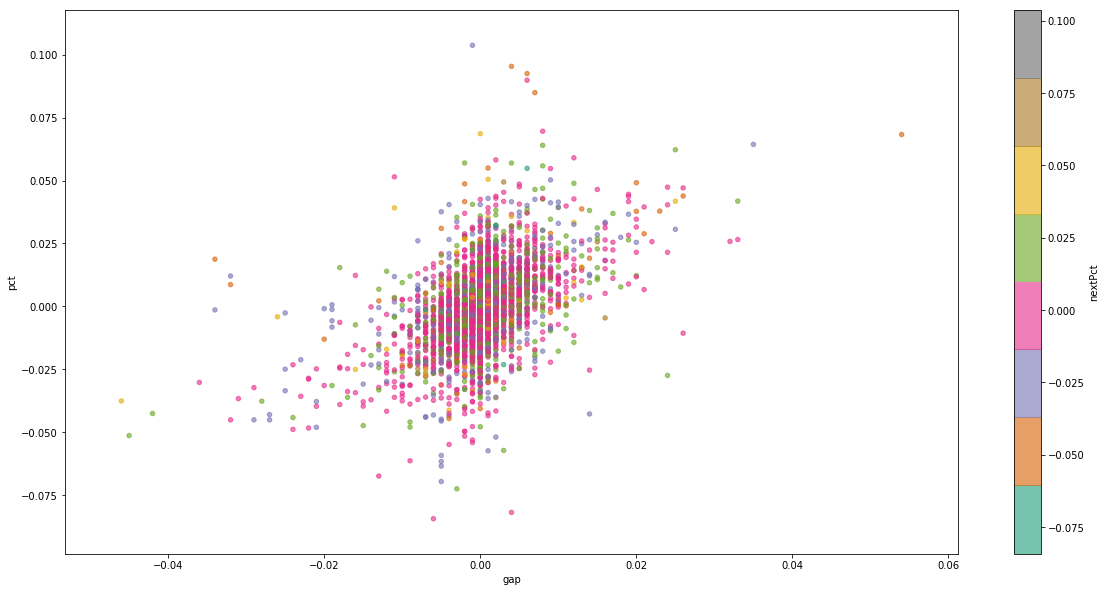

In [40]:
dfMean.plot(kind="scatter", x="gap", y="pct", alpha=0.6, c="nextPct", cmap=plt.get_cmap("Dark2"), colorbar=True,
    sharex=False)
plt.savefig('gappctnextpct.png')


[]

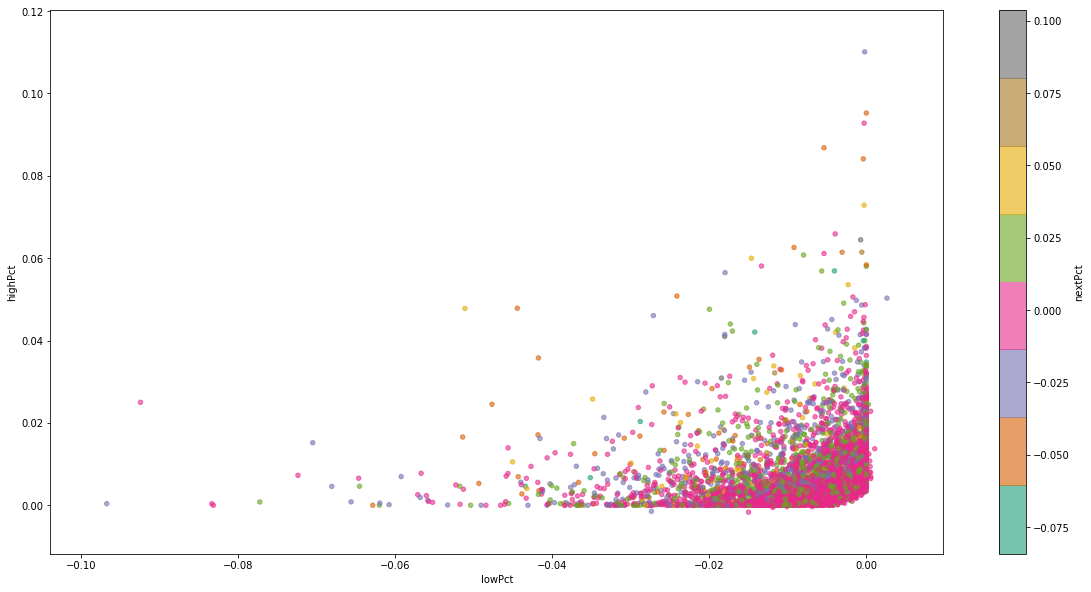

In [65]:
dfMean.plot(kind="scatter", x="lowPct", y="highPct", alpha=0.6, c="nextPct", cmap=plt.get_cmap("Dark2"), colorbar=True,
    sharex=False)
plt.plot()

In [66]:
corr_matrix = dfMean.corr()
corr_matrix["nextPct"].sort_values(ascending=False)

nextPct           1.000000
lowPct            0.076550
gap               0.002408
closeHighRatio   -0.020355
pct              -0.026688
highPct          -0.094440
Name: nextPct, dtype: float64

C:\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


[]

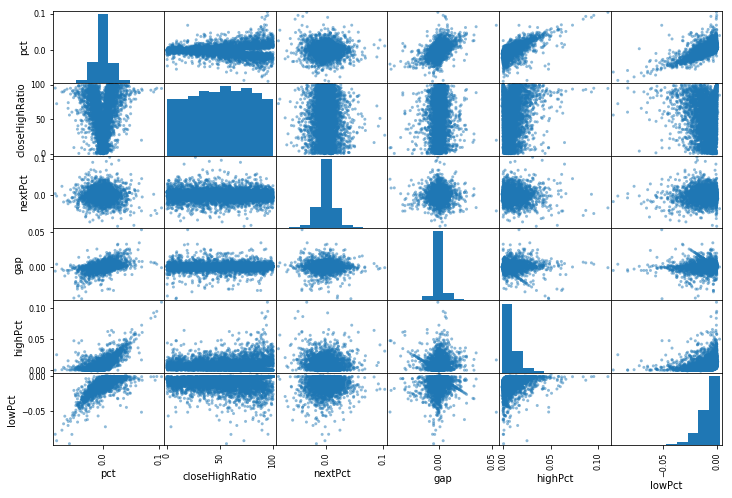

In [68]:
from pandas.tools.plotting import scatter_matrix


scatter_matrix(dfMean, figsize=(12, 8))
plt.plot()

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


X = dfMean[['pct', 'closeHighRatio', 'gap', 'highPct', 'lowPct']]
X = proprocessing.scale(X)
Y = dfMean['nextPct']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

NameError: name 'proprocessing' is not defined

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression R squared": 0.0192
Linear Regression RMSE: 0.0143
Linear Regression MAE: 0.0104


In [71]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
print('Random Forest R squared": %.4f' % regressor.score(X_test, y_test))

forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

forest_mae = mean_absolute_error(y_pred, y_test)
print('Random Forest MAE: %.4f' % forest_mae)

C:\Python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest R squared": 0.0192
Random Forest RMSE: 0.0158
Random Forest MAE: 0.0113


In [72]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

gb = ensemble.GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('GradientBoosting R squared": %.4f' % regressor.score(X_test, y_test))

gb_mse = mean_squared_error(y_pred, y_test)
gb_rmse = np.sqrt(forest_mse)
print('GradientBoosting RMSE: %.4f' % gb_rmse)

gb_mae = mean_absolute_error(y_pred, y_test)
print('GradientBoosting MAE: %.4f' % gb_mae)

GradientBoosting R squared": 0.0192
GradientBoosting RMSE: 0.0158
GradientBoosting MAE: 0.0105


In [73]:
feature_labels = np.array(['pct', 'closeHighRatio', 'gap', 'highPct', 'lowPct', 'nextPct'])
importance = gb.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

closeHighRatio - 13.60%
pct - 16.73%
gap - 19.71%
highPct - 22.92%
lowPct - 27.05%
